<ipython-input-3-8f387378fbd1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['AFR_AF'] = pd.to_numeric(df_filtered['AFR_AF'], errors='coerce')
<ipython-input-3-8f387378fbd1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['EUR_AF'] = pd.to_numeric(df_filtered['EUR_AF'], errors='coerce')
<ipython-input-3-8f387378fbd1>:35: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  s

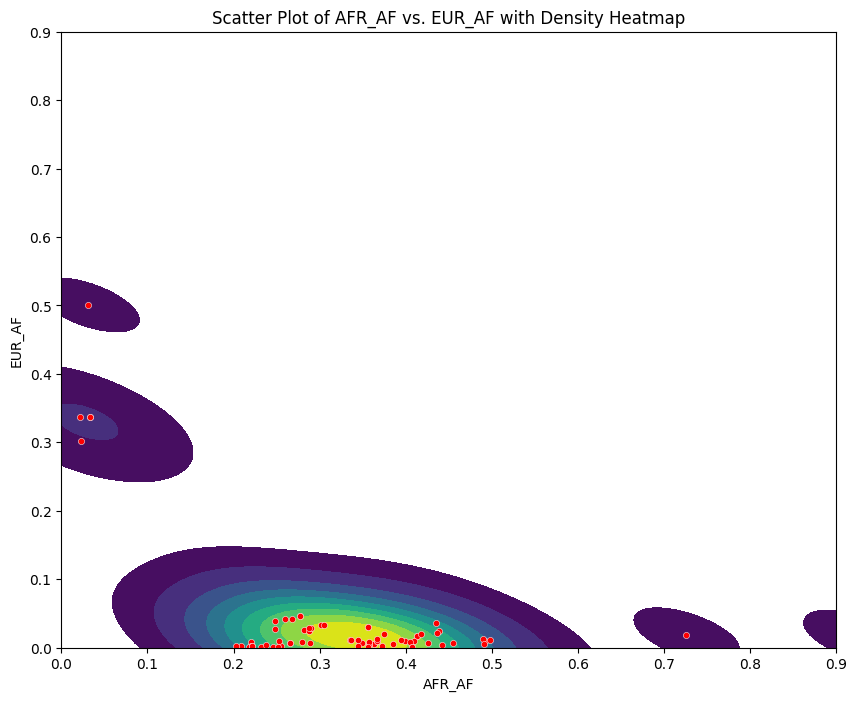

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

try:
    df = pd.read_csv('path to maf file goes here', sep='\t', comment='#', low_memory=False)
except FileNotFoundError:
    print("Error: File not found. Please ensure the file path is correct.")
    exit()


# Filter for rows where both AFR_AF and EUR_AF are populated
df_filtered = df.dropna(subset=['AFR_AF', 'EUR_AF'])


# Convert the columns to numeric, coercing errors to NaN
df_filtered['AFR_AF'] = pd.to_numeric(df_filtered['AFR_AF'], errors='coerce')
df_filtered['EUR_AF'] = pd.to_numeric(df_filtered['EUR_AF'], errors='coerce')

# Filter again for rows with valid numeric values
df_filtered = df_filtered.dropna(subset=['AFR_AF', 'EUR_AF'])


# Apply the criteria: difference >= 0.2 and smaller number < 0.05
df_plot = df_filtered[
    ((df_filtered['AFR_AF'] - df_filtered['EUR_AF']).abs() >= 0.2) &
    (np.minimum(df_filtered['AFR_AF'], df_filtered['EUR_AF']) < 0.05)
]

# Create the scatter plot with a density heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.kdeplot(x=df_plot['AFR_AF'], y=df_plot['EUR_AF'], cmap="viridis", shade=True, thresh=0.05, levels=10)


#Overlay the scatter plot on the heatmap
sns.scatterplot(x='AFR_AF', y='EUR_AF', data=df_plot, color='red', s=20) # s parameter controls the marker size

plt.xlim(0, .9)  # Example: Set x-axis limit from 0 to 0.5
plt.ylim(0, 0.9)

plt.xlabel('AFR_AF')
plt.ylabel('EUR_AF')
plt.title('Scatter Plot of AFR_AF vs. EUR_AF with Density Heatmap')
plt.show()